<a href="https://colab.research.google.com/github/JeyyGit/machine-learning-tasks/blob/main/week_6/K_Means_Clustering_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_iris  # Mengimpor modul untuk dataset iris

# Memuat dataset iris
data = load_iris()

# Menyimpan fitur-fitur dan label-label dari dataset iris
X = data.data  # Fitur-fitur
y = data.target  # Label-label

# Menampilkan informasi dataset
print("Informasi dataset Iris:")
print(data.DESCR)

Informasi dataset Iris:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== =

In [4]:
from sklearn.model_selection import train_test_split  # Mengimpor modul untuk membagi data

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data latih dan data uji
print("Ukuran data latih:", X_train.shape, y_train.shape)
print("Ukuran data uji:", X_test.shape, y_test.shape)


Ukuran data latih: (120, 4) (120,)
Ukuran data uji: (30, 4) (30,)


In [9]:
import pandas as pd  # Mengimpor modul pandas

# Membuat dataframe dari dataset iris
df = pd.DataFrame(data= data.data, columns= data.feature_names)

# Menampilkan lima baris pertama dari dataframe
print("Dataframe Iris:")
df.head()

Dataframe Iris:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [11]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


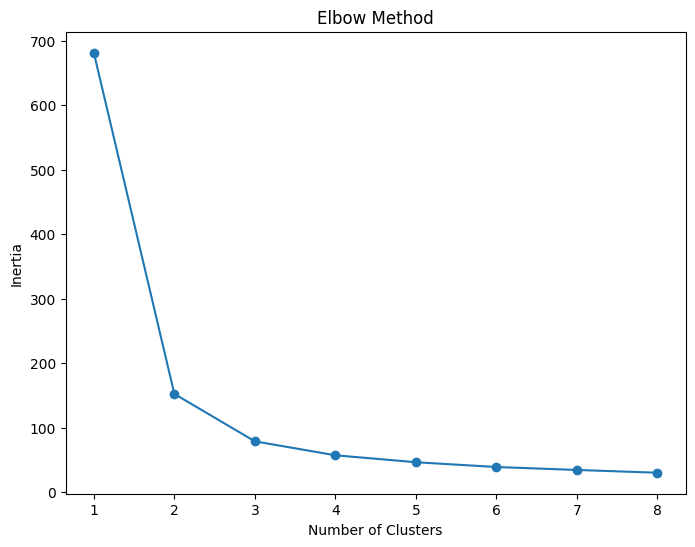

In [14]:
import matplotlib.pyplot as plt  # Mengimpor modul matplotlib
from sklearn.cluster import KMeans  # Mengimpor modul KMeans

# Menentukan jumlah cluster yang akan diuji
num_clusters = range(1, 9)

# Menyimpan inersia dalam list
inertias = []
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Membuat plot elbow method
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


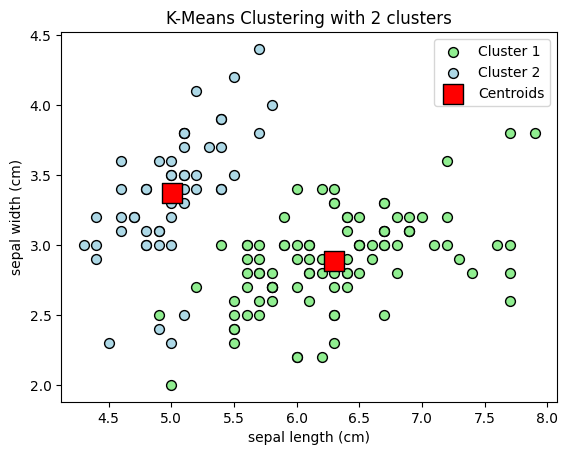

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Menetapkan jumlah cluster
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(X)

# Memperoleh label prediksi dari model
y_kmeans = kmeans.predict(X)

# Memvisualisasikan hasil clustering
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='lightgreen', edgecolors='black', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='lightblue', edgecolors='black', label='Cluster 2')

# Memvisualisasikan pusat kluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='s', edgecolors='black', label='Centroids')
plt.title('K-Means Clustering with 2 clusters')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import silhouette_score
import numpy as np

# List untuk menyimpan skor siluet
silhouette_scores = []

# Menentukan rentang jumlah kluster yang akan diuji
num_clusters_range = range(2, 9)

# Menghitung skor siluet untuk setiap percobaan
for k in num_clusters_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan skor siluet untuk setiap percobaan
for i, score in enumerate(silhouette_scores):
    print(f"Silhouette score for {num_clusters_range[i]} clusters: {score}")


Silhouette score for 2 clusters: 0.6810461692117462
Silhouette score for 3 clusters: 0.5528190123564095
Silhouette score for 4 clusters: 0.49805050499728737
Silhouette score for 5 clusters: 0.48874888709310566
Silhouette score for 6 clusters: 0.36483400396700255
Silhouette score for 7 clusters: 0.349748162116121
Silhouette score for 8 clusters: 0.35745369258527165


In [18]:
from sklearn.metrics import davies_bouldin_score

# List untuk menyimpan skor Davies Bouldin
davies_bouldin_scores = []

# Menghitung skor Davies Bouldin untuk setiap percobaan
for k in num_clusters_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    davies_bouldin_avg = davies_bouldin_score(X, cluster_labels)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Menampilkan skor Davies Bouldin untuk setiap percobaan
for i, score in enumerate(davies_bouldin_scores):
    print(f"Davies Bouldin score for {num_clusters_range[i]} clusters: {score}")


Davies Bouldin score for 2 clusters: 0.40429283717304343
Davies Bouldin score for 3 clusters: 0.6619715465007465
Davies Bouldin score for 4 clusters: 0.7803069838811109
Davies Bouldin score for 5 clusters: 0.8059652120182736
Davies Bouldin score for 6 clusters: 0.9141579726538027
Davies Bouldin score for 7 clusters: 0.9778891580937105
Davies Bouldin score for 8 clusters: 0.9227907767459385


In [19]:
from sklearn.metrics import calinski_harabasz_score

# List untuk menyimpan skor Calinski-Harabasz
calinski_harabasz_scores = []

# Menghitung skor Calinski-Harabasz untuk setiap percobaan
for k in num_clusters_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    calinski_harabasz_avg = calinski_harabasz_score(X, cluster_labels)
    calinski_harabasz_scores.append(calinski_harabasz_avg)

# Menampilkan skor Calinski-Harabasz untuk setiap percobaan
for i, score in enumerate(calinski_harabasz_scores):
    print(f"Calinski-Harabasz score for {num_clusters_range[i]} clusters: {score}")


Calinski-Harabasz score for 2 clusters: 513.9245459802768
Calinski-Harabasz score for 3 clusters: 561.62775662962
Calinski-Harabasz score for 4 clusters: 530.7658081872851
Calinski-Harabasz score for 5 clusters: 495.54148767768777
Calinski-Harabasz score for 6 clusters: 473.8506068330425
Calinski-Harabasz score for 7 clusters: 447.2885154164413
Calinski-Harabasz score for 8 clusters: 437.6032109356821
